In [155]:
import requests
import json
import pandas as pd
from config import nyt_key
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
months = ["3","4","5","6","7"]
# month = "7"
year = "2020"

# publication_date = []
# document_type = []
# headline = []
# abstract = []
# snippet = []
# lead_paragraph = []
keywords = []
keyword_dates = []

for month in months:
    base_url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={nyt_key}"
    response = requests.get(base_url).json()["response"]["docs"]
    for i in response:
#         if len(i["keywords"]) >= 3:
#             publication_date.append(i["pub_date"])
#             document_type.append(i["document_type"])
#             headline.append(i["headline"]["main"])
#             abstract.append(i["abstract"])
#             snippet.append(i["snippet"])
#             lead_paragraph.append(i["lead_paragraph"])
        for j in i["keywords"]:
            keywords.append(j["value"])
            keyword_dates.append(i["pub_date"])
print(len(keywords))
print(len(keyword_dates))

222630
222630


In [157]:
data = {
#     "publication_date":publication_date,
#     "document_type":document_type,
#     "headline":headline,
#     "abstract":abstract,
#     "snippet":snippet,
#     "lead_paragraph":lead_paragraph,
#     "keyword_1":keyword_1,
#     "keyword_2":keyword_2,
#     "keyword_3":keyword_3,
    "publication_date":keyword_dates,
    "keywords":keywords
}

In [158]:
df = pd.DataFrame(data)
df.head()

,publication_date,keywords
0,2020-03-01T07:22:34+0000,Television
1,2020-03-01T07:22:34+0000,Saturday Night Live (TV Program)
2,2020-03-01T07:22:34+0000,"Mulaney, John"
3,2020-03-01T23:00:05+0000,Crossword Puzzles
4,2020-03-01T11:51:43+0000,Presidential Election of 2020


In [159]:
series = df["keywords"].value_counts()
series.to_csv(f"Output/DFs/{year}_keywords.csv")

In [160]:
series

Coronavirus (2019-nCoV)                          13756
United States Politics and Government             4004
Trump, Donald J                                   3745
Presidential Election of 2020                     3035
Quarantines                                       2929
                                                 ...  
Anxiety and Depression Association of America        1
Ibuprofen (Drug)                                     1
Holliday, John Henry                                 1
Scorpionfish (Book)                                  1
DeHaan, Dane                                         1
Name: keywords, Length: 21443, dtype: int64

### Repeated the above code for each year, saving each year's data in a separate csv on local drive
* Only allowed 10 pulls per minute from NYT api

### Loaded csv's from hard drive after pulling and saving each year's data

In [161]:
df_2020 = pd.read_csv("Output/DFs/2020_keywords.csv")
df_2016 = pd.read_csv("Output/DFs/2016_keywords.csv")
df_2012 = pd.read_csv("Output/DFs/2012_keywords.csv")
df_2008 = pd.read_csv("Output/DFs/2008_keywords.csv")

In [162]:
# combine into one dataframe
df_new = pd.concat([df_2020,df_2016,df_2012,df_2008],axis=1)
df_new = df_new.rename(columns={df_new.columns[0]:"keywords_2020",df_new.columns[1]:"count_2020"})
newcolumns=df_new.columns.values

# change column names
newcolumns[0] = 'keywords_2020'
newcolumns[1] = 'count_2020'
newcolumns[2] = 'keywords_2016'
newcolumns[3] = 'count_2016'
newcolumns[4] = 'keywords_2012'
newcolumns[5] = 'count_2012'
newcolumns[6] = 'keywords_2008'
newcolumns[7] = 'count_2008'
df_new

,keywords_2020,count_2020,keywords_2016,count_2016,keywords_2012,count_2012,keywords_2008,count_2008
0,Coronavirus (2019-nCoV),13756.0,Presidential Election of 2016,4504,Presidential Election of 2012,2485.0,Presidential Election of 2008,2268.0
1,United States Politics and Government,4004.0,"Trump, Donald J",3050,New York City,2222.0,Books and Literature,1799.0
2,"Trump, Donald J",3745.0,"Clinton, Hillary Rodham",1815,"Obama, Barack",2154.0,"Obama, Barack",1466.0
3,Presidential Election of 2020,3035.0,Books and Literature,1793,Books and Literature,2085.0,Politics and Government,1365.0
4,Quarantines,2929.0,New York City,1646,"Romney, Mitt",1828.0,Computers and the Internet,1348.0
...,...,...,...,...,...,...,...,...
26657,NaN,NaN,TheVerge.com,1,NaN,NaN,NaN,NaN
26658,NaN,NaN,"Vitkova, Maya (1978- )",1,NaN,NaN,NaN,NaN
26659,NaN,NaN,Luke's Tail Cart (Food Truck),1,NaN,NaN,NaN,NaN
26660,NaN,NaN,"Tobey, William H",1,NaN,NaN,NaN,NaN


In [163]:
# sav new df to local drive
df_new.to_csv("Output/DFs/total_keyword_count.csv",index=False)

In [164]:
# confirm save
df = pd.read_csv("Output/DFs/total_keyword_count.csv")
df

,keywords_2020,count_2020,keywords_2016,count_2016,keywords_2012,count_2012,keywords_2008,count_2008
0,Coronavirus (2019-nCoV),13756.0,Presidential Election of 2016,4504,Presidential Election of 2012,2485.0,Presidential Election of 2008,2268.0
1,United States Politics and Government,4004.0,"Trump, Donald J",3050,New York City,2222.0,Books and Literature,1799.0
2,"Trump, Donald J",3745.0,"Clinton, Hillary Rodham",1815,"Obama, Barack",2154.0,"Obama, Barack",1466.0
3,Presidential Election of 2020,3035.0,Books and Literature,1793,Books and Literature,2085.0,Politics and Government,1365.0
4,Quarantines,2929.0,New York City,1646,"Romney, Mitt",1828.0,Computers and the Internet,1348.0
...,...,...,...,...,...,...,...,...
26657,NaN,NaN,TheVerge.com,1,NaN,NaN,NaN,NaN
26658,NaN,NaN,"Vitkova, Maya (1978- )",1,NaN,NaN,NaN,NaN
26659,NaN,NaN,Luke's Tail Cart (Food Truck),1,NaN,NaN,NaN,NaN
26660,NaN,NaN,"Tobey, William H",1,NaN,NaN,NaN,NaN


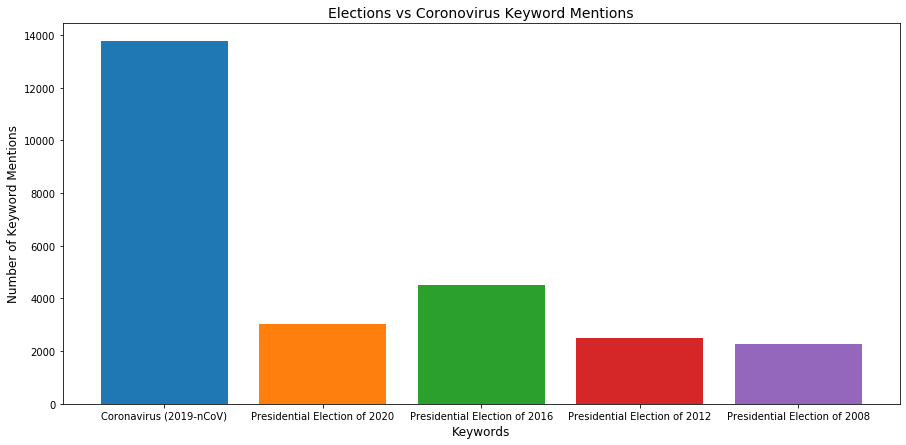

In [165]:
row = df.iloc[0,:]
row_3 = df.iloc[3,:]
plt.figure(figsize=(15,7))
plt.bar(row[0],row[1])
plt.bar(row_3[0],row_3[1])
plt.bar(row[2],row[3])
plt.bar(row[4],row[5])
plt.bar(row[6],row[7])
plt.ylabel("Number of Keyword Mentions",size=12)
plt.xlabel("Keywords",size=12)
plt.title("Elections vs Coronovirus Keyword Mentions",size=14)
# plt.savefig("Output/Figures/elections_vs_coronavirus.png")
plt.show()